<a href="https://colab.research.google.com/github/hasanmisaii/Data-Science/blob/main/Logistic_Regression_in_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from cv2 import ml
from sklearn.datasets import make_blobs
from sklearn import model_selection as ms
from numpy import float32
from matplotlib.pyplot import scatter, show, subplots

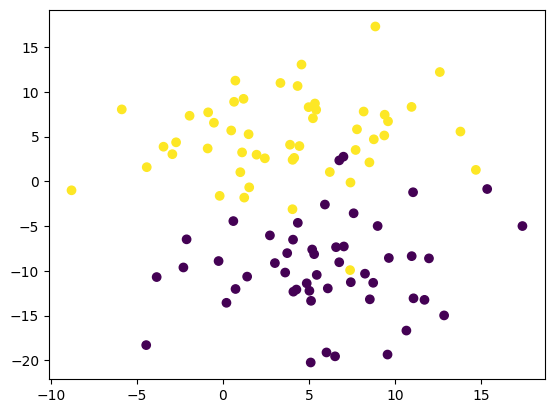

In [6]:
# Generate a dataset of 2D data points and their ground truth labels
x, y_true = make_blobs(n_samples=100, centers=2, cluster_std=5, random_state=10)

# Plot the dataset
scatter(x[:, 0], x[:, 1], c=y_true)
show()

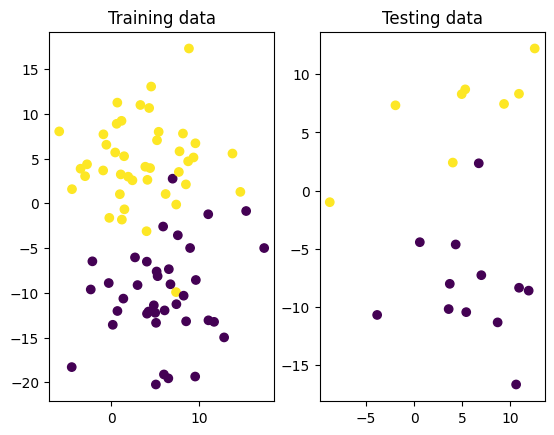

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = ms.train_test_split(x, y_true, test_size=0.2, random_state=10)

# Plot the training and testing datasets
fig, (ax1, ax2) = subplots(1, 2)
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax1.set_title('Training data')
ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax2.set_title('Testing data')
show()

In [10]:
# Create an empty logistic regression model
lr = ml.LogisticRegression_create()

In [12]:
# Check the default training method
print("Training Method:", lr.getTrainMethod())

Training Method: 0


In [13]:
# Set the training method to Mini-Batch Gradient Descent and the size of the mini-batch
lr.setTrainMethod(ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(5)

In [14]:
# Set the number of iterations
lr.setIterations(10)

In [15]:
# Train the logistic regressor on the set of training data
lr.train(x_train.astype(float32), ml.ROW_SAMPLE, y_train.astype(float32))

True

In [16]:
# Print the learned coefficients
print(lr.get_learnt_thetas())

[[0.01652797 0.00234642 0.24174221]]


In [19]:
# Predict the target labels of the testing data
_, y_pred = lr.predict(x_test.astype(float32))

# Compute and print the achieved accuracy
accuracy = (sum(y_pred[:, 0].astype(int) == y_test) / y_test.size) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 90.0 %


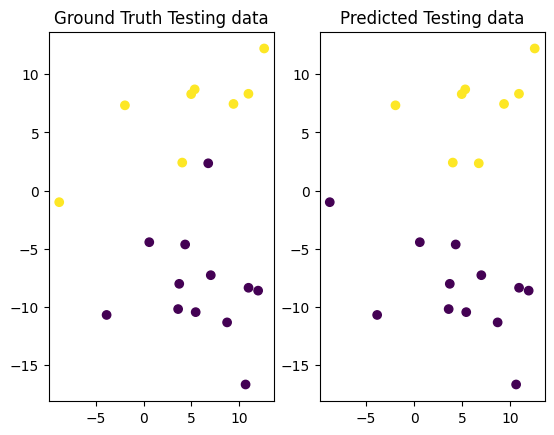

Ground truth class labels: [0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0] 
 Predicted class labels: [0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0]


In [20]:
# Plot the ground truth and predicted class labels
fig, (ax1, ax2) = subplots(1, 2)
ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax1.set_title('Ground Truth Testing data')
ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)
ax2.set_title('Predicted Testing data')
show()

# Print the ground truth and predicted class labels of the testing data
print('Ground truth class labels:', y_test, '\n',
      'Predicted class labels:', y_pred[:, 0].astype(int))